# 01. Data Cleaning

---

In this notebook, I clean the dataset by executing the following.
    - 1) Imputing null values
    - 2) Detecting typos and correcting them
    - 3) Turning non-numeric features and categorical features into quantatative numeric feature.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in train data

df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Feature Classification
Feature columns were saparated into two big categories as following
1. `numeric_cols`: columns with numeric data type                    
    1-1. `quantatative_cols`: columns with quantatative values                 
    1-2. `categorical_cols`: columns that use numbers as category
2. `non_numeric_cols`: columns with non-numeric data type (string etc.)

In [4]:
# type_df: dictionary of column's types
type_df = pd.DataFrame(df.dtypes, columns= {'type':0})

# numeric_cols: list of column names with numeric type (int, float)
numeric_cols = list(type_df.loc[(type_df['type']== type(1))|(type_df['type']== type(1.1)), :].index)

# quantatative_cols: list of column names with quantatative data type
quantatative_cols = numeric_cols[3:5]+numeric_cols[9:26]+numeric_cols[27:36]+numeric_cols[38:]

# categorical_cols: list of numerical columns that are categorical
categorical_cols = [numeric_cols[2]] + numeric_cols[5:9] + [numeric_cols[26]] + numeric_cols[36:38]

# non-numeric cols:
non_numeric_cols = list(type_df.loc[(type_df['type']== type_df.loc[ 'MS Zoning' , :][0] ), :].index)

# Cleaning

1. Quantatative features (`quantatative_cols`)              
2. Categorical features (`categorical_cols`)
3. non-numeric features (`non_numeric_cols`)

<a id='quan'></a>
### 1. Quantatative Features

In [5]:
# Check if there are null values
df[quantatative_cols].isnull().sum().sort_values()

Half Bath            0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Open Porch SF        0
Wood Deck SF         0
Fireplaces           0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Misc Val             0
Full Bath            0
SalePrice            0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Lot Area             0
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        22
Lot Frontage       330
dtype: int64

- **Lot Frontage**:  Null value were replaced with the average lot frontage for the corresponding Lot Config.     

In [6]:
# Make dictionary of 'Lot Config' items and their corresponding 'Lot Frontage' average

Lot_Frontage_NA_fill = dict(zip(list(df.loc[:, ['Lot Frontage','Lot Config']].groupby('Lot Config')\
                                   .mean()['Lot Frontage'].keys()),
     list(df.loc[:, ['Lot Frontage','Lot Config']].groupby('Lot Config').mean()['Lot Frontage'].values)))

In [7]:
Lot_Frontage_NA_fill

{'Corner': 83.24555160142349,
 'CulDSac': 55.22857142857143,
 'FR2': 60.83673469387755,
 'FR3': 87.0,
 'Inside': 66.95277989337396}

In [8]:
def lf_filler(row):
    
    """
    Replace null value in 'Lot Frontage column" with the average 'Lot Frontage' for the corresponding 'Lot Config'
    
    Parameter:
        - row: series/ ex) 'dataframe.apply(lf_filler, axis = 1)'
    """
    
    if np.isnan(row['Lot Frontage']):
        fill = Lot_Frontage_NA_fill[row['Lot Config']]
        
    else:
        fill = row['Lot Frontage']
    return fill

In [9]:
df['Lot Frontage'] = df.apply(lf_filler, axis = 1)

In [10]:
df.loc[:, ['Lot Frontage','Lot Config']].isnull().sum()

Lot Frontage    0
Lot Config      0
dtype: int64

- **Rest of the quantatative columns** were imputed with the column's mean.

In [11]:
def mean_filler(cols, inplace):
    """
    Replace na values with its column's mean
    
    Paramters:
        cols: list/ list of column names
        inplace: boolean/ inplace = True or False
    """    
    for col in cols:
        df[col].fillna(df[col].mean(), inplace = inplace)

In [12]:
# Replace the NA values from the rest of the quatatative columns with its mean 

mean_filler(quantatative_cols, True)

In [13]:
# Check if there are null values
df[quantatative_cols].isnull().sum().sort_values()

Lot Frontage       0
Pool Area          0
Screen Porch       0
3Ssn Porch         0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Garage Area        0
Garage Cars        0
Fireplaces         0
TotRms AbvGrd      0
Kitchen AbvGr      0
Bedroom AbvGr      0
Misc Val           0
Half Bath          0
Bsmt Half Bath     0
Bsmt Full Bath     0
Gr Liv Area        0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Total Bsmt SF      0
Bsmt Unf SF        0
BsmtFin SF 2       0
BsmtFin SF 1       0
Mas Vnr Area       0
Lot Area           0
Full Bath          0
SalePrice          0
dtype: int64

<a id='quan'></a>
### 2. Categorical Features

In [14]:
df[categorical_cols].isnull().sum()

MS SubClass         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Garage Yr Blt     114
Mo Sold             0
Yr Sold             0
dtype: int64

**Garage Yr Blt** is the only column that has a null value. If 'Garage Yr Blt' is NA, it is becuase there is no garage in the property.

- Cleaning:
    - NA values in 'Garage Yr Blt' will be 'no_garage'
    - 'old garage' will be 'old_garage'
    - 'new garage' will be 'new_garage'
    - Dummy out the 'Garage Yr Blt'

In [15]:
# 'Garage Yr Blt' column typo corrected (2207.0 -> 2007)
# Assume 2207.0 is typo of 2007 because Year Remod/Add and Yr Sold are 2007 and 2207 is similiar to 2007.

# Garage Yr Blt: 1895 ~ 2010

df['Garage Yr Blt'].replace(2207.0, 2007, inplace = True)

In [16]:
def Garage_Yr_Blt_filler(row):
    
    """
    Replace each row of 'Garage Yr Blt' column as following:
        NA: 'no_garage'
        >= 1975: 'new_garage'
        < 1975: 'old_garage'
    
    Parameter:
        - row: series/ ex) 'dataframe.apply(lf_filler, axis = 1)'
    """
    
    if np.isnan(row['Garage Yr Blt']):
        fill = 'no_garage'
        
    elif row['Garage Yr Blt'] >= 1975:
        fill = 'new_garage'
        
    else:
        fill = 'old_garage'
    return fill

In [17]:
# NA values in 'Garage Yr Blt' will be 'no_garage'
df['Garage Yr Blt'] = df.apply(Garage_Yr_Blt_filler, axis = 1)

In [18]:
df['Garage Yr Blt'].value_counts()

new_garage    1143
old_garage     794
no_garage      114
Name: Garage Yr Blt, dtype: int64

In [19]:
df = pd.get_dummies(df, columns= ['Garage Yr Blt'], drop_first=True)

In [20]:
df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_no_garage,Garage Yr Blt_old_garage
0,109,533352170,60,RL,55.228571,13517,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,WD,130500,0,0
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,4,2009,WD,220000,0,0


'Garage Yr Blt_no_garage' and 'Garage Yr Blt_old_garage' columns were added

### 3. Non-numeric Features
- Part A. Turning non-numeric features into numeric features
- Part B. Null value imputing

#### Part A. Turning non-numeric features into numeric features

In [21]:
df[non_numeric_cols].isnull().sum().sort_values(ascending = False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Condition 1          0
Neighborhood         0
Condition 2          0
Bldg Type            0
Sale Type            0
Lot Config           0
Land Slope           0
Roof Style           0
Utilities            0
Land Contour         0
Lot Shape            0
Street               0
House Style          0
Foundation           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Kitchen Qual         0
Functional           0
Paved Drive          0
MS Zoning            0
dtype: int64

#### `Neighborhood`
The column was classified into two groups. One group with the average sale price is higher than overall average (`g_nbr`) and lower than overall average (`w_nbr`).

- `g_nbr`:                        
'Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'Greens','GrnHill', 'NWAmes', 'NoRidge', 'NridgHt', 'SawyerW', 'Somerst','StoneBr', 'Timber', 'Veenker'
           
- `w_nbr`:                           
'Blueste', 'BrDale', 'BrkSide', 'Edwards', 'IDOTRR', 'Landmrk', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'OldTown', 'SWISU', 'Sawyer' 

In [22]:
nbr_group = df.loc[:, ['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean()
nbr_group = nbr_group.reset_index()
nbr_group.head()

,Neighborhood,SalePrice
0,Blmngtn,200417.681818
1,Blueste,144566.666667
2,BrDale,103371.052632
3,BrkSide,127022.697368
4,ClearCr,217490.074074


Text(0.5, 1.0, 'Average Sale Price by Neighborhood')

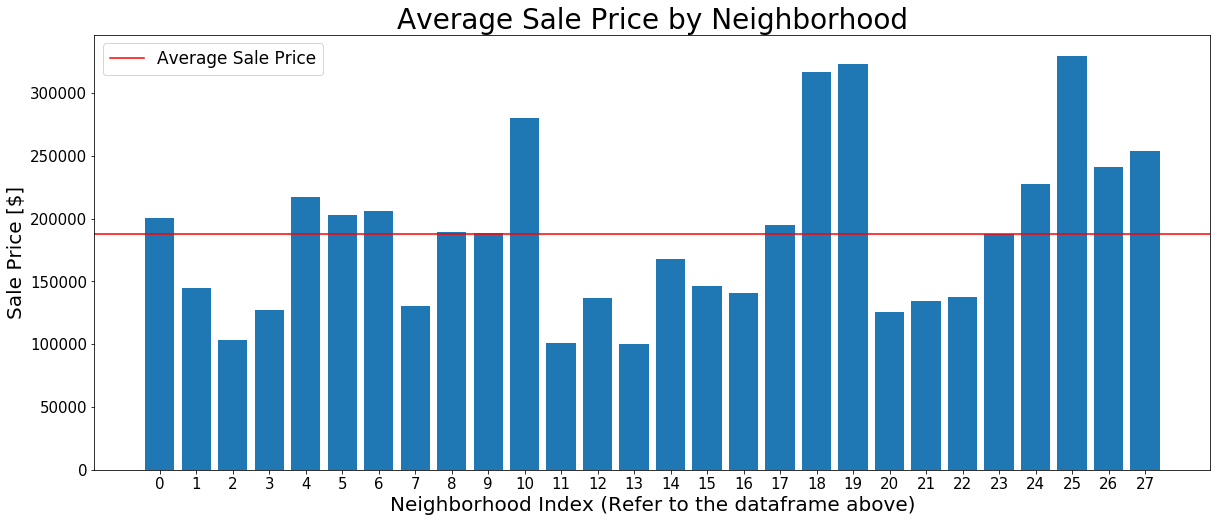

In [23]:
plt.figure(figsize = (20,8))
plt.bar(nbr_group.index, nbr_group.iloc[:,1].values)
plt.axhline(nbr_group.iloc[:,1].values.mean(), color='red', label = 'Average Sale Price')
plt.xlabel('Neighborhood Index (Refer to the dataframe above)', fontsize = 20)
plt.ylabel('Sale Price [$]', fontsize = 20)
plt.xticks(ticks = np.arange(len(list(nbr_group.index))),
           labels = list(nbr_group.index), 
           fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 17)
plt.title('Average Sale Price by Neighborhood', fontsize = 28)

Observation:
- The column was classified into two groups. One group with the average sale price is higher than overall average (`g_nbr`) and lower than overall average (`w_nbr`). The columns that has its top above the red line is `g_nbr` and the rest are `w_nbr`

In [24]:
# Dividing 'Neighborhood' into two categories

g_nbr = nbr_group.loc[nbr_group['SalePrice'] > nbr_group.iloc[:,1].values.mean(), :]['Neighborhood'].values
w_nbr = nbr_group.loc[nbr_group['SalePrice'] < nbr_group.iloc[:,1].values.mean(), :]['Neighborhood'].values

In [25]:
"""
Binarize 'Neighborhood' column as following:
    - 1: Neighborhoods with the lower sale price average
    - 0: Neighborhoods with the higher sale price average
"""

df['Neighborhood'] = df['Neighborhood'].apply(lambda x: 1 if x in g_nbr else 0)

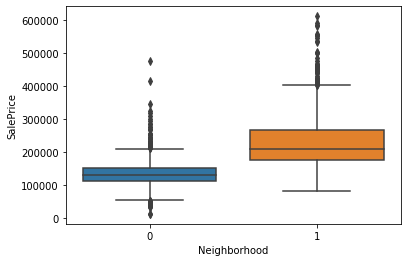

In [26]:
sns.boxplot(x = 'Neighborhood', y = 'SalePrice' ,data = df)

In [27]:
df['Neighborhood'].value_counts()

0    1053
1     998
Name: Neighborhood, dtype: int64

#### Central Air, Street
    - These two features have two items each.
    - Action: Binarize them into 0 and 1

#### a. Central Air

In [28]:
df.loc[:, ['Central Air', 'SalePrice']].groupby('Central Air').mean()

,SalePrice
Central Air,
N,100575.078014
Y,187441.503665


In [29]:
df['Central Air'] = df['Central Air'].apply(lambda x: 1 if x == 'Y' else 0)

In [30]:
df.loc[:, ['Central Air', 'SalePrice']].groupby('Central Air').mean()

,SalePrice
Central Air,
0,100575.078014
1,187441.503665


#### b. Street

In [31]:
df.loc[:, ['Street', 'SalePrice']].groupby('Street').mean()

,SalePrice
Street,
Grvl,86901.428571
Pave,181793.565558


In [32]:
df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0)

In [33]:
df.loc[:, ['Street', 'SalePrice']].groupby('Street').mean()

,SalePrice
Street,
0,86901.428571
1,181793.565558


#### Columns with ranked items (ex. good, average, bad)
    - Columns: 'Heating QC', 'Kitchen Qual', 'Exter Qual', 'Exter Cond'
    - Action: Assign numerical score

In [34]:
def unique_vals(df):
    """
    Return dictionary that has
         key == column names
         value == the column's unique values
    """
    
    val_dic = {}
    for col in df.columns:
        val_dic.update({col: df[col].unique()})
    return val_dic

In [35]:
# Make dictionary to turn string score to numerical score

str_score_5 = ['Ex','Gd','TA','Fa', 'Po']
num_score_5 = np.arange(5,-1,-1)
score_5_dict = dict(zip(str_score_5, num_score_5))

str_score_4 = ['Ex','Gd','TA','Fa']
num_score_4 = np.arange(4,-1,-1)
score_4_dict = dict(zip(str_score_4, num_score_4))

In [36]:
score_4_dict

{'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1}

In [37]:
# View unique values
ranking_cols =['Heating QC', 'Kitchen Qual',
                      'Exter Qual', 'Exter Cond']

score_df = df.loc[:, ranking_cols]
unique_vals(score_df)

{'Heating QC': array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object),
 'Kitchen Qual': array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object),
 'Exter Qual': array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object),
 'Exter Cond': array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)}

In [38]:
# Turn string score to numerical score

df['Exter Cond'] = df['Exter Cond'].map(score_5_dict)
df['Heating QC'] = df['Heating QC'].map(score_5_dict)
df['Kitchen Qual'] = df['Kitchen Qual'].map(score_4_dict)
df['Exter Qual'] = df['Exter Qual'].map(score_4_dict)

#### Part B. Null value imputing

According to the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), many features use null value to describe when a house part is not on the premises. In other words, the null values are not really missing. Instead, they convey information.

- Actions
    - NA values in `Misc Feature` means no miscellaneous feature on the premises not covered in other columns. This does not seem significant. Therefore, drop this column.
    - Non numerical features were filled in with a string value, 'no'
    - All non-numeric columns were dummied out

In [39]:
# Drop `Misc Feature` column
df = df.drop('Misc Feature', axis = 1)

In [40]:
null_cols = ['Pool QC', 'Alley', 'Fence',
             'Fireplace Qu', 'Garage Finish',
             'Garage Qual', 'Garage Cond', 'Garage Type',
             'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual',
             'Bsmt Cond', 'BsmtFin Type 1', 'Mas Vnr Type']

In [41]:
# Replace null values from `null_cols` with string 'no'
for null_col in null_cols:
    df.loc[:, null_col].fillna('no', inplace = True)

In [42]:
# Dummy out all numeric columns
to_be_dummy_cols = df.loc[:, df.dtypes == object].columns
df = pd.get_dummies(df, columns= to_be_dummy_cols, drop_first=True)

In [43]:
df.isnull().sum().sum()

0

In [44]:
df.shape

(2051, 225)

Save the cleaned dataset as "clean_train.csv"

In [45]:
df.to_csv("./datasets/clean_train.csv", index = False)

Check if "clean_train.csv" was saved appropriately

In [46]:
pd.read_csv("./datasets/clean_train.csv").isnull().sum().sum()

0

In [47]:
pd.read_csv("./datasets/clean_train.csv").shape

(2051, 225)